In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import random
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder

# compressing the ML future warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# data balancing techniques
from imblearn.over_sampling import SMOTE
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.single import GlobalBestPSO 

# machine learning model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# deep learning model
from tensorflow import keras
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Input, Reshape

In [148]:
dataframe = pd.read_csv("./wustl_iiot_2021.csv")

In [149]:
# select few records considering the dataset is much
df = dataframe.sample(n=10000, random_state=42)

In [150]:
df.head()

,StartTime,LastTime,SrcAddr,DstAddr,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,...,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Traffic,Target
683447,2019-08-19 16:13:23,2019-08-19 16:13:23,192.168.0.20,192.168.0.2,0,60062,502,10,8,18,...,24,20,44,0.000581,0.053567,0,0.0,0.0,normal,0
100608,2019-08-19 12:17:32,2019-08-19 12:17:32,192.168.0.20,192.168.0.2,0,58800,502,10,8,18,...,24,20,44,0.001114,0.055472,0,0.0,0.0,normal,0
679628,2019-08-19 12:08:36,2019-08-19 12:08:36,192.168.0.20,192.168.0.2,0,50154,502,10,8,18,...,24,20,44,0.000673,0.052966,0,0.0,0.0,normal,0
762058,2019-08-19 11:11:06,2019-08-19 11:11:06,192.168.0.20,192.168.0.2,0,53463,502,10,8,18,...,24,20,44,0.000720,0.052454,0,0.0,0.0,normal,0
875286,2019-08-19 09:51:30,2019-08-19 09:51:30,192.168.0.20,192.168.0.2,0,59742,502,10,8,18,...,24,20,44,0.001187,0.053182,0,0.0,0.0,normal,0


In [151]:
print(f"The WUSKIL dataset has {df.shape[0]} records with {df.shape[1]} features")

The WUSKIL dataset has 10000 records with 49 features


In [152]:
df.dtypes

StartTime      object
LastTime       object
SrcAddr        object
DstAddr        object
Mean            int64
Sport           int64
Dport           int64
SrcPkts         int64
DstPkts         int64
TotPkts         int64
DstBytes        int64
SrcBytes        int64
TotBytes        int64
SrcLoad       float64
DstLoad       float64
Load          float64
SrcRate       float64
DstRate       float64
Rate          float64
SrcLoss         int64
DstLoss         int64
Loss            int64
pLoss         float64
SrcJitter     float64
DstJitter     float64
SIntPkt       float64
DIntPkt       float64
Proto           int64
Dur           float64
TcpRtt        float64
IdleTime        int64
Sum           float64
Min           float64
Max           float64
sDSb            int64
sTtl            int64
dTtl            int64
sIpId           int64
dIpId           int64
SAppBytes       int64
DAppBytes       int64
TotAppByte      int64
SynAck        float64
RunTime       float64
sTos            int64
SrcJitAct 

In [153]:
# checking the data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 683447 to 991002
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StartTime   10000 non-null  object 
 1   LastTime    10000 non-null  object 
 2   SrcAddr     10000 non-null  object 
 3   DstAddr     10000 non-null  object 
 4   Mean        10000 non-null  int64  
 5   Sport       10000 non-null  int64  
 6   Dport       10000 non-null  int64  
 7   SrcPkts     10000 non-null  int64  
 8   DstPkts     10000 non-null  int64  
 9   TotPkts     10000 non-null  int64  
 10  DstBytes    10000 non-null  int64  
 11  SrcBytes    10000 non-null  int64  
 12  TotBytes    10000 non-null  int64  
 13  SrcLoad     10000 non-null  float64
 14  DstLoad     10000 non-null  float64
 15  Load        10000 non-null  float64
 16  SrcRate     10000 non-null  float64
 17  DstRate     10000 non-null  float64
 18  Rate        10000 non-null  float64
 19  SrcLoss     10000 n

In [154]:
# getting the statistical descriptions
df.describe()

,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,TotBytes,SrcLoad,...,dIpId,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Target
count,10000.0000,1.000000e+04,10000.00000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.1316,5.456395e+04,862.50450,1.194822e+03,65.816400,1.205439e+03,9.248172e+03,8.873684e+04,5.603935e+04,1.650103e+07,...,29404.479500,256.464000,8.337529e+03,1.239313e+06,0.002469,0.201958,0.003200,60.436335,0.257723,0.076200
std,0.6968,2.957451e+04,3734.22757,1.075292e+05,3174.118829,1.075294e+05,8.234098e+05,8.105708e+06,4.676489e+06,8.500217e+07,...,20273.677356,3228.271151,8.160901e+05,6.869995e+07,0.070043,0.805803,0.226263,407.353831,4.307658,0.265331
min,0.0000,0.000000e+00,0.00000,0.000000e+00,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,5.204475e+04,502.00000,1.000000e+01,8.000000,1.800000e+01,5.080000e+02,6.440000e+02,1.152000e+03,8.519584e+04,...,10755.750000,24.000000,2.000000e+01,4.400000e+01,0.000631,0.051340,0.000000,0.000000,0.000000,0.000000
50%,0.0000,5.648800e+04,502.00000,1.000000e+01,8.000000,1.800000e+01,5.080000e+02,6.440000e+02,1.152000e+03,8.820706e+04,...,29319.500000,24.000000,2.000000e+01,4.400000e+01,0.000676,0.052044,0.000000,0.000000,0.000000,0.000000
75%,0.0000,6.094000e+04,502.00000,1.000000e+01,8.000000,1.800000e+01,5.080000e+02,6.440000e+02,1.152000e+03,8.969997e+04,...,46629.000000,24.000000,2.000000e+01,4.400000e+01,0.000804,0.053214,0.000000,0.000000,0.000000,0.000000
max,5.0000,2.765721e+06,64998.00000,1.073058e+07,184973.000000,1.073058e+07,8.229263e+07,8.094289e+08,4.602379e+08,5.440000e+08,...,65508.000000,66401.000000,8.160870e+07,4.145246e+09,2.903334,5.097530,16.000000,4918.187500,95.791336,1.000000


In [155]:
df.columns

Index(['StartTime', 'LastTime', 'SrcAddr', 'DstAddr', 'Mean', 'Sport', 'Dport',
       'SrcPkts', 'DstPkts', 'TotPkts', 'DstBytes', 'SrcBytes', 'TotBytes',
       'SrcLoad', 'DstLoad', 'Load', 'SrcRate', 'DstRate', 'Rate', 'SrcLoss',
       'DstLoss', 'Loss', 'pLoss', 'SrcJitter', 'DstJitter', 'SIntPkt',
       'DIntPkt', 'Proto', 'Dur', 'TcpRtt', 'IdleTime', 'Sum', 'Min', 'Max',
       'sDSb', 'sTtl', 'dTtl', 'sIpId', 'dIpId', 'SAppBytes', 'DAppBytes',
       'TotAppByte', 'SynAck', 'RunTime', 'sTos', 'SrcJitAct', 'DstJitAct',
       'Traffic', 'Target'],
      dtype='object')

In [156]:
def plot_corr_matrix(cols):
    plt.figure(figsize=(10, 8))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df[cols].corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)

    # Show the plot
    plt.show()
    
def plot_attributes(df, label, xlabel):
    # Plotting the distribution of classes in the 'label' column
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=label, data=df)
    plt.title('Distribution of Classes in the Label Column')
    plt.xlabel(xlabel)
    plt.ylabel('Count')

    # Rotate x-axis labels for better visibility
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    plt.show()

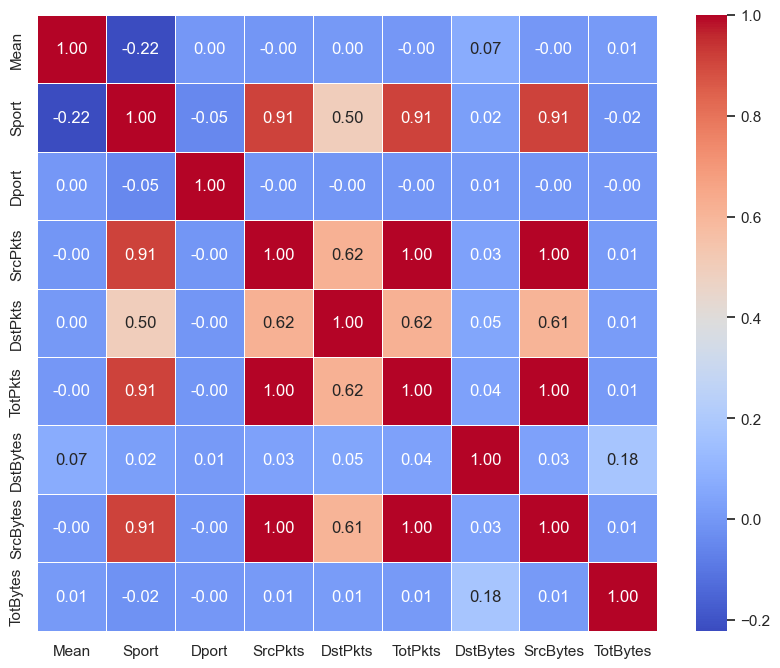

In [157]:
# checking the dataset correlations 
plot_corr_matrix(['Mean', 'Sport', 'Dport',
       'SrcPkts', 'DstPkts', 'TotPkts', 'DstBytes', 'SrcBytes', 'TotBytes',])

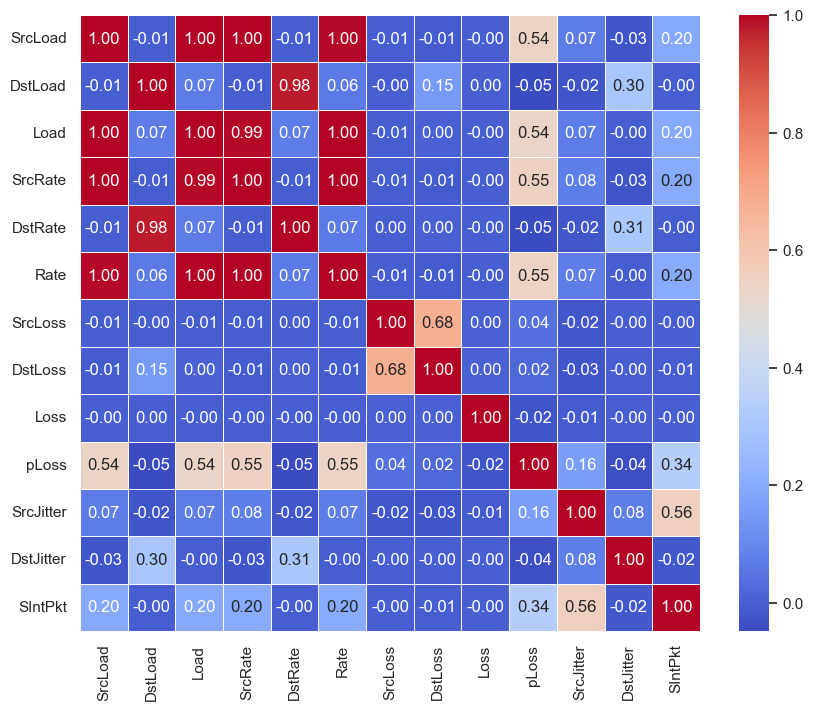

In [158]:
# checking the dataset correlations 
plot_corr_matrix(['SrcLoad', 'DstLoad', 'Load', 'SrcRate', 'DstRate', 'Rate', 'SrcLoss',
       'DstLoss', 'Loss', 'pLoss', 'SrcJitter', 'DstJitter', 'SIntPkt',])

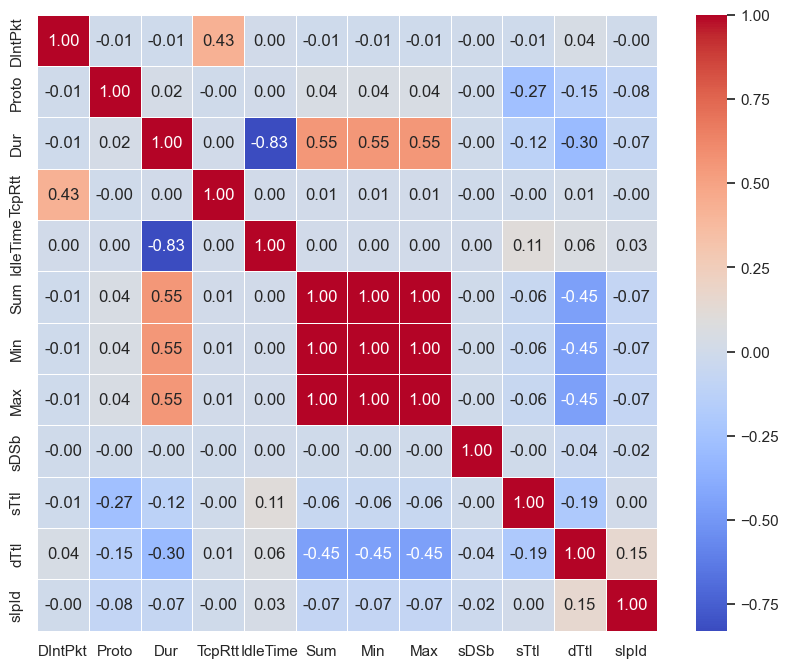

In [159]:
# checking the dataset correlations 
plot_corr_matrix([  'DIntPkt', 'Proto', 'Dur', 'TcpRtt', 'IdleTime', 'Sum', 'Min', 'Max',
       'sDSb', 'sTtl', 'dTtl', 'sIpId', ])

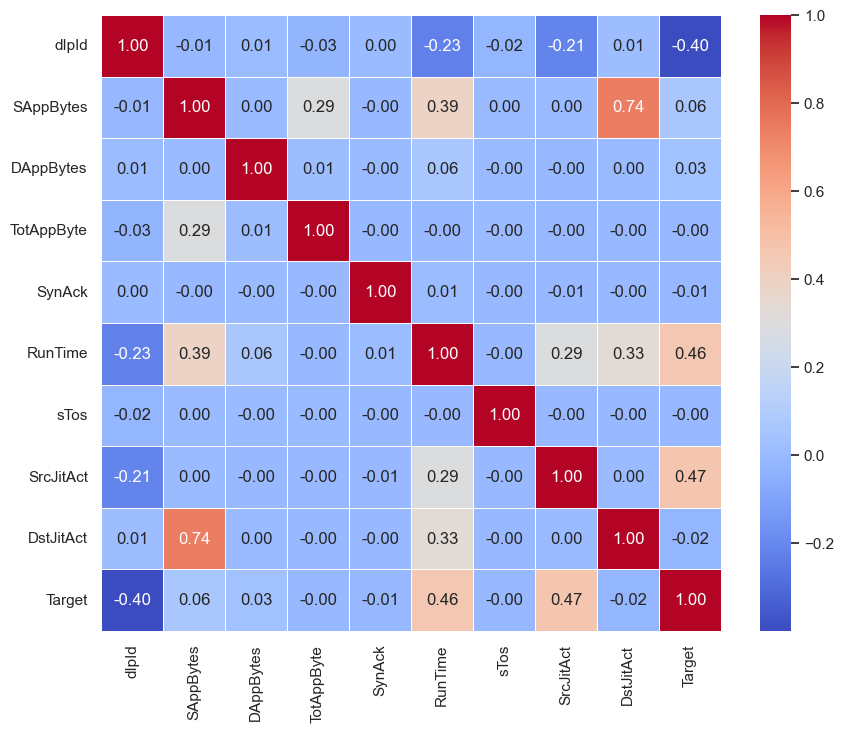

In [160]:
# checking the dataset correlations 
plot_corr_matrix(['dIpId', 'SAppBytes', 'DAppBytes','TotAppByte', 'SynAck', 'RunTime', 'sTos', 'SrcJitAct', 'DstJitAct',
       'Traffic', 'Target'])

In [161]:
# checking the unique values for the SrcAddr columns
df["SrcAddr"].value_counts()

192.168.0.20                 9088
209.240.235.92                400
192.168.0.10                  236
192.168.0.44                   78
20.1.249.77                    68
49.48.134.64                   58
192.168.0.2                    44
01:80:c2:00:00:0e              18
0                               4
fe80::e9ed:931f:c2e0:1333       3
0.0.0.0                         2
fe80::9bc:3b2b:78d3:855c        1
Name: SrcAddr, dtype: int64

In [162]:
# checking the unique values for the DstAddr columns
df["DstAddr"].value_counts()

192.168.0.2          9653
192.168.0.20          182
192.168.0.1            51
192.168.0.255          47
255.255.255.255        21
6c:b0:ce:22:b0:57      18
192.168.0.44           16
ff02::1:2               4
239.255.255.250         2
28856                   1
66335                   1
224.0.0.252             1
0.0.0.1                 1
4952                    1
66401                   1
Name: DstAddr, dtype: int64

In [163]:
# checking the unique values for the Traffic columns
df["Traffic"].value_counts()

normal      9238
DoS          677
Reconn        78
CommInj        5
Backdoor       2
Name: Traffic, dtype: int64

In [164]:
# checking the unique values for the Targets columns
df["Target"].value_counts()

0    9238
1     762
Name: Target, dtype: int64

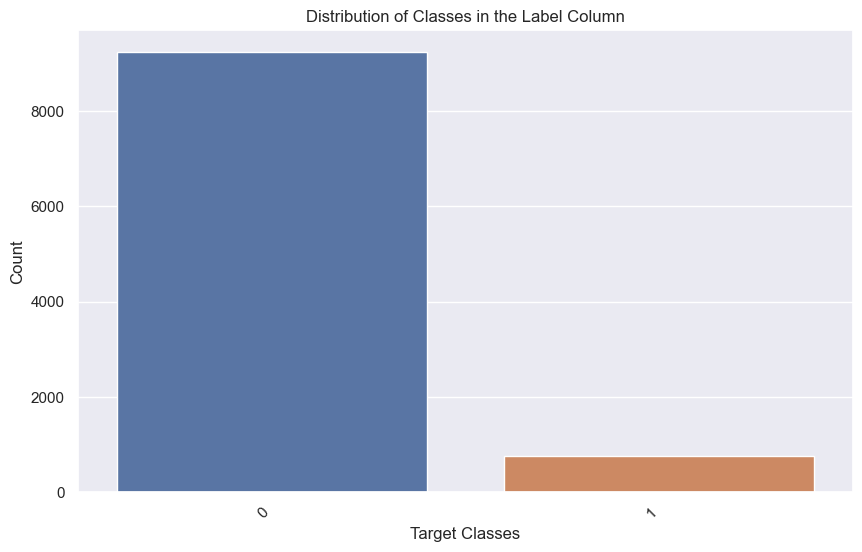

In [165]:
# dataset is highly imbalance as visualized the the dataset and thus requires databalancing
plot_attributes(df, "Target", "Target Classes")

In [166]:
# encode the field that needed encoding
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        label_encoder = LabelEncoder()
        df[col_name] = label_encoder.fit_transform(df[col_name])
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'StartTime' has 8192 categories
Feature 'LastTime' has 8197 categories
Feature 'SrcAddr' has 12 categories
Feature 'DstAddr' has 15 categories
Feature 'Traffic' has 5 categories


In [167]:
# checking for missing values
df.isna().sum()

StartTime     0
LastTime      0
SrcAddr       0
DstAddr       0
Mean          0
Sport         0
Dport         0
SrcPkts       0
DstPkts       0
TotPkts       0
DstBytes      0
SrcBytes      0
TotBytes      0
SrcLoad       0
DstLoad       0
Load          0
SrcRate       0
DstRate       0
Rate          0
SrcLoss       0
DstLoss       0
Loss          0
pLoss         0
SrcJitter     0
DstJitter     0
SIntPkt       0
DIntPkt       0
Proto         0
Dur           0
TcpRtt        0
IdleTime      0
Sum           0
Min           0
Max           0
sDSb          0
sTtl          0
dTtl          0
sIpId         0
dIpId         0
SAppBytes     0
DAppBytes     0
TotAppByte    0
SynAck        0
RunTime       0
sTos          0
SrcJitAct     0
DstJitAct     0
Traffic       0
Target        0
dtype: int64

In [168]:
df.dtypes

StartTime       int32
LastTime        int32
SrcAddr         int32
DstAddr         int32
Mean            int64
Sport           int64
Dport           int64
SrcPkts         int64
DstPkts         int64
TotPkts         int64
DstBytes        int64
SrcBytes        int64
TotBytes        int64
SrcLoad       float64
DstLoad       float64
Load          float64
SrcRate       float64
DstRate       float64
Rate          float64
SrcLoss         int64
DstLoss         int64
Loss            int64
pLoss         float64
SrcJitter     float64
DstJitter     float64
SIntPkt       float64
DIntPkt       float64
Proto           int64
Dur           float64
TcpRtt        float64
IdleTime        int64
Sum           float64
Min           float64
Max           float64
sDSb            int64
sTtl            int64
dTtl            int64
sIpId           int64
dIpId           int64
SAppBytes       int64
DAppBytes       int64
TotAppByte      int64
SynAck        float64
RunTime       float64
sTos            int64
SrcJitAct 

In [169]:
X = df.drop('Target', 1)
Y = df["Target"]

In [170]:
X_cols = X.columns

In [171]:
scale = MinMaxScaler().fit(X)
X = scale.transform(X)

all_X = pd.DataFrame(X, columns=X_cols)

In [174]:
type(all_X)

pandas.core.frame.DataFrame

# SMOTE datalancing 

In [175]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training data
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [176]:
y_resampled.value_counts()

0    9238
1    9238
Name: Target, dtype: int64

# Particle Swarm Optimization

In [177]:
# Define the objective function
def objective_function(features):
    # Convert binary indices to integer indices
    selected_features = np.where(features == 1)[0]

    # Train a model using only the selected features
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train[:, selected_features], y_train)
    
    # Make predictions on the validation set
    predictions = clf.predict(X_val[:, selected_features])
    accuracy = accuracy_score(y_val, predictions)
    
    # Maximize accuracy, so return the negative value
    return -accuracy

# Particle class
class Particle:
    def __init__(self, num_features):
        self.position = np.random.choice([0, 1], size=num_features)
        self.velocity = np.random.uniform(0, 1, size=num_features)
        self.best_position = np.copy(self.position)
        self.best_fitness = float('-inf')

# PSO function for feature selection
def particle_swarm_optimization(num_particles, num_iterations, num_features):
    particles = [Particle(num_features) for _ in range(num_particles)]

    global_best_position = None
    global_best_fitness = float('-inf')

    inertia_weight = 0.5
    cognitive_coeff = 1.5
    social_coeff = 2.0

    for iteration in range(num_iterations):
#         print(f"iteration {iteration}")
        for particle in particles:
            fitness = objective_function(particle.position)
#             print(f"iteration {iteration} objective run")

            if fitness > particle.best_fitness:
                particle.best_fitness = fitness
                particle.best_position = np.copy(particle.position)

            if fitness > global_best_fitness:
                global_best_fitness = fitness
                global_best_position = np.copy(particle.position)

        for particle in particles:
            particle.velocity = update_velocity(particle, global_best_position, inertia_weight, cognitive_coeff, social_coeff)
            particle.position = np.round(1 / (1 + np.exp(-particle.velocity)))

    return global_best_position

# Update velocity function
def update_velocity(particle, global_best_position, inertia_weight, cognitive_coeff, social_coeff):
    inertia_term = inertia_weight * particle.velocity
    cognitive_term = cognitive_coeff * np.random.rand() * (particle.best_position - particle.position)
    social_term = social_coeff * np.random.rand() * (global_best_position - particle.position)

    new_velocity = inertia_term + cognitive_term + social_term
    return new_velocity


# Assuming X and y are your feature matrix and labels
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

num_particles = 10
num_iterations = 50
num_features = X_train.shape[1]

selected_features = particle_swarm_optimization(num_particles, num_iterations, num_features)
print("Selected Features:", selected_features)

Selected Features: [0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0.]


In [181]:
print(len(selected_features))
print(all_X.shape)

48
(10000, 48)


### displaying selected columns based on their names. this are the columns selected by PSO

In [185]:

selected_columns = all_X.columns[selected_features == 1]

# Get the selected data from the DataFrame
X_selected = all_X[selected_columns]
print("Selected Features names using particle swarm optimization algorithms are:", X_selected.columns)

Selected Features names using particle swarm optimization algorithms are: Index(['DstAddr', 'Mean', 'Dport', 'SrcPkts', 'DstPkts', 'SrcBytes',
       'TotBytes', 'DstLoad', 'Load', 'SrcRate', 'Rate', 'DstLoss', 'pLoss',
       'SrcJitter', 'DstJitter', 'SIntPkt', 'DIntPkt', 'Proto', 'IdleTime',
       'DAppBytes', 'RunTime', 'sTos', 'SrcJitAct'],
      dtype='object')


In [186]:
# Get the indices of the selected features
selected_indices = np.where(selected_features == 1)[0]

# # Get the corresponding column names from X_train
# selected_columns = [f'Feature_{index + 1}' for index in selected_indices]

# print("Selected Columns:", selected_columns)

In [187]:
X_train = X_train[:, selected_indices]
X_val = X_val[:, selected_indices]

In [188]:
def evaluation_model (model, label):
    # Predictions on the test set
    y_pred = model.predict(X_val)

    # Convert predictions to binary values (0 or 1)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Classification Report
    class_report = classification_report(y_val, y_pred_binary)
    print(f"\n {label} Classification Report:")
    print(class_report)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_val, y_pred_binary)
    print(f"\n {label} Confusion Matrix:")
    print(conf_matrix)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Machine Learning Algorithm


 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1822
           1       1.00      1.00      1.00      1874

    accuracy                           1.00      3696
   macro avg       1.00      1.00      1.00      3696
weighted avg       1.00      1.00      1.00      3696


 Random Forest Confusion Matrix:
[[1815    7]
 [   0 1874]]


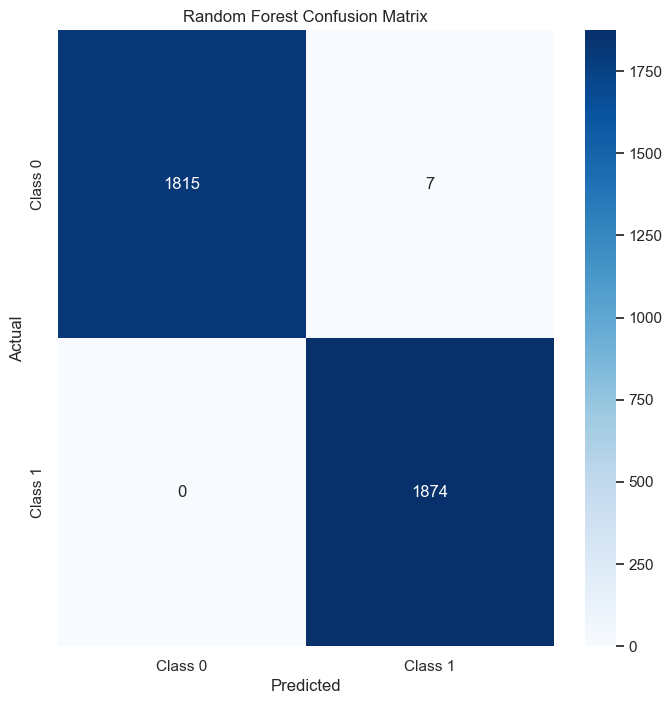

In [141]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_scores = rf.score(X_val, y_val)

evaluation_model(rf, "Random Forest")


 KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1822
           1       0.99      1.00      1.00      1874

    accuracy                           1.00      3696
   macro avg       1.00      1.00      1.00      3696
weighted avg       1.00      1.00      1.00      3696


 KNN Confusion Matrix:
[[1812   10]
 [   4 1870]]


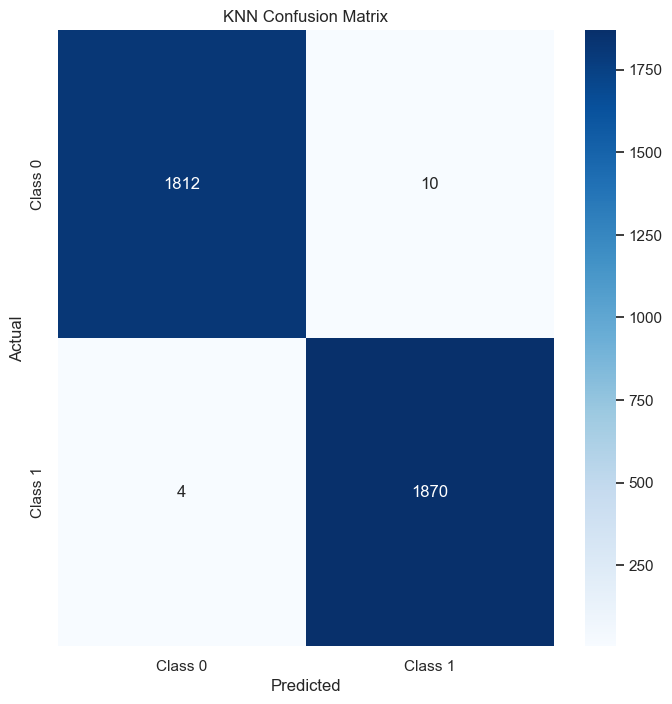

In [142]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_scores = knn.score(X_val, y_val)

evaluation_model(knn, "KNN")

# Deep learning algorithm

In [143]:
x_train = pd.DataFrame(X_train)
x_train = x_train.values
sample = x_train.shape[0]
features = x_train.shape[1]

#Train: convert 2D to 3D for input RNN
x_train = np.reshape(x_train,(sample,features,1))
#Test: convert 2D to 3D for input RNN
x_test=pd.DataFrame(X_val)
x_test = x_test.values
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

### LSTM-Model

In [144]:
lstm_model = keras.Sequential([
        keras.layers.LSTM(80, input_shape = (features,x_train.shape[2]),
                          activation='tanh', recurrent_activation='hard_sigmoid'),
        keras.layers.Dense(1,activation="tanh")
    ])

lstm_model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

#Training the model
lstm_model.fit(x_train, y_train, epochs=10, batch_size= 32) 
lstm_model.summary()

# Final evaluation of the model
scores = lstm_model.evaluate(X_val, y_val, verbose=0)
print("/n")
print("LSTM Accuracy: %.2f%%" % (scores[1] * 100))

Epoch 1/10
462/462 [==============================] - 9s 14ms/step - loss: 0.0739 - accuracy: 0.9191
Epoch 2/10
462/462 [==============================] - 8s 16ms/step - loss: 0.0322 - accuracy: 0.9654
Epoch 3/10
462/462 [==============================] - 7s 15ms/step - loss: 0.0257 - accuracy: 0.9737
Epoch 4/10
462/462 [==============================] - 8s 17ms/step - loss: 0.0192 - accuracy: 0.9791
Epoch 5/10
462/462 [==============================] - 7s 16ms/step - loss: 0.0162 - accuracy: 0.9813
Epoch 6/10
462/462 [==============================] - 8s 17ms/step - loss: 0.0146 - accuracy: 0.9832
Epoch 7/10
462/462 [==============================] - 7s 16ms/step - loss: 0.0127 - accuracy: 0.9856
Epoch 8/10
462/462 [==============================] - 8s 17ms/step - loss: 0.0126 - accuracy: 0.9856
Epoch 9/10
462/462 [==============================] - 7s 16ms/step - loss: 0.0125 - accuracy: 0.9859
Epoch 10/10
462/462 [==============================] - 8s 17ms/step - loss: 0.0122 - accura

### GRU-Model

In [145]:
gru_model = keras.Sequential([
        keras.layers.GRU(80, input_shape=(features, x_train.shape[2]),
                         activation='tanh', recurrent_activation='hard_sigmoid'),
        keras.layers.Dense(1, activation="tanh")
    ])

gru_model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

# Training the model
gru_model.fit(x_train, y_train, epochs=10, batch_size=32)
gru_model.summary()

# Final evaluation of the model
gru_scores = gru_model.evaluate(X_val, y_val, verbose=0)
print("\n")
print("GRU Accuracy: %.2f%%" % (gru_scores[1] * 100))

Epoch 1/10
462/462 [==============================] - 9s 12ms/step - loss: 0.0997 - accuracy: 0.8816
Epoch 2/10
462/462 [==============================] - 6s 14ms/step - loss: 0.0297 - accuracy: 0.9735
Epoch 3/10
462/462 [==============================] - 6s 13ms/step - loss: 0.0245 - accuracy: 0.9756
Epoch 4/10
462/462 [==============================] - 6s 14ms/step - loss: 0.0206 - accuracy: 0.9781
Epoch 5/10
462/462 [==============================] - 7s 16ms/step - loss: 0.0147 - accuracy: 0.9869
Epoch 6/10
462/462 [==============================] - 7s 15ms/step - loss: 0.0131 - accuracy: 0.9870
Epoch 7/10
462/462 [==============================] - 8s 17ms/step - loss: 0.0125 - accuracy: 0.9866
Epoch 8/10
462/462 [==============================] - 7s 15ms/step - loss: 0.0122 - accuracy: 0.9873
Epoch 9/10
462/462 [==============================] - 8s 17ms/step - loss: 0.0108 - accuracy: 0.9886
Epoch 10/10
462/462 [==============================] - 7s 15ms/step - loss: 0.0102 - accura

116/116 [==============================] - 1s 5ms/step

 LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1822
           1       0.99      0.99      0.99      1874

    accuracy                           0.99      3696
   macro avg       0.99      0.99      0.99      3696
weighted avg       0.99      0.99      0.99      3696


 LSTM Confusion Matrix:
[[1802   20]
 [  19 1855]]


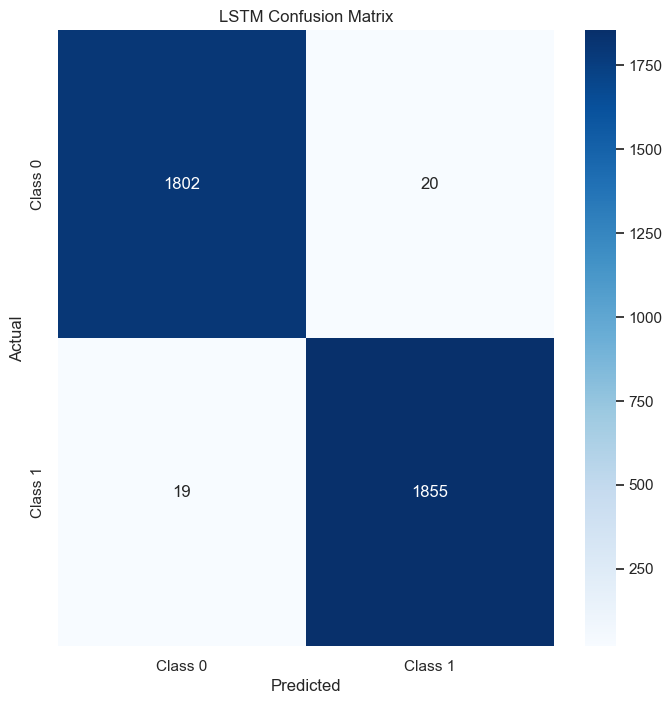

116/116 [==============================] - 1s 3ms/step

 GRU Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1822
           1       0.99      0.99      0.99      1874

    accuracy                           0.99      3696
   macro avg       0.99      0.99      0.99      3696
weighted avg       0.99      0.99      0.99      3696


 GRU Confusion Matrix:
[[1800   22]
 [  18 1856]]


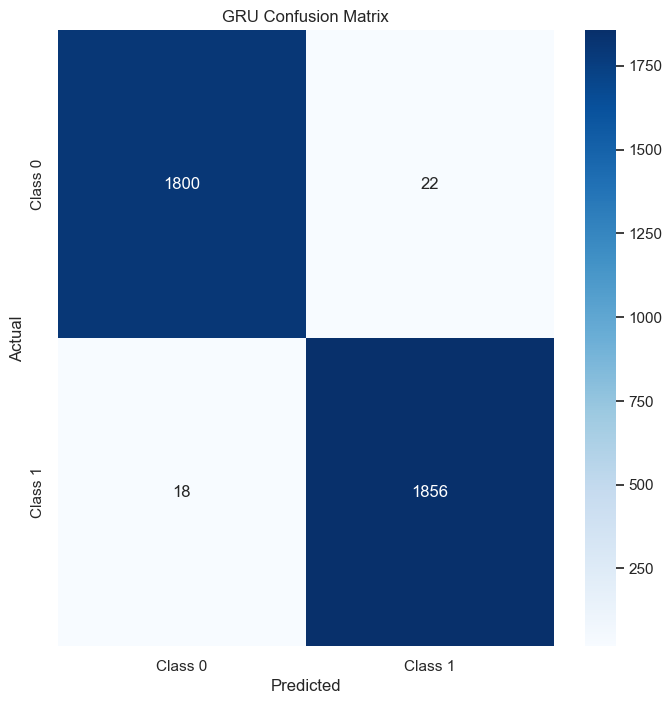

In [146]:
evaluation_model (lstm_model, "LSTM")
evaluation_model (gru_model, "GRU")